<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-a-chloropleth" data-toc-modified-id="Plotting-a-chloropleth-1">Plotting a chloropleth</a></span></li></ul></div>

## Import Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import json
import folium

In [41]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
country_geo = r'/Users/profkdfischer/World Happiness Report Analysis/Exercise data for demos/us-states.json'

In [4]:
country_geo

'/Users/profkdfischer/World Happiness Report Analysis/Exercise data for demos/us-states.json'

In [9]:
# open the us states json file
f = open(r'/Users/profkdfischer/World Happiness Report Analysis/Exercise data for demos/us-states.json',)

# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# define path
path = r'/Users/profkdfischer/World Happiness Report Analysis/Exercise data for demos'

In [6]:
# Import the recipes data
df = pd.read_csv(os.path.join(path, 'recipes.csv'))

In [10]:
# check the head
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# check the shape
df.shape

(20052, 680)

In [20]:
pd.set_option('display.max_columns', None)

In [23]:
# check the columns
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

## Data Wrangling

In [27]:
# Select only the necessary columns and put them in a list called columns

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [28]:
# Create a subset
state_rec = df[columns]

In [29]:
# check it
state_rec.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,nebraska,new hampshire,new jersey,new mexico,new york,north carolina,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [30]:
# check the shape
state_rec.shape

(20052, 49)

In [31]:
# Select only the states from state_rec in a new subset

states_num = state_rec[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [32]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure
s2 = states_num.idxmax(axis=1)

In [37]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [42]:
# Create new column 'state' in the state_rec dataframe

state_rec['STATE_NAME'] = s2

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/2289483485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


In [44]:
state_rec.head(30)

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,nebraska,new hampshire,new jersey,new mexico,new york,north carolina,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium,STATE_NAME
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Best Blts,4.375,948.0,19.0,79.0,1042.0,alabama
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,alabama
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,alabama
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,alabama
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,alabama


In [45]:
# Drop the dummy columns from the dataframe

state_rec.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/3895877212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec.drop(columns = ["alabama",


In [46]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [47]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california


In [48]:
type(state_rec)

pandas.core.frame.DataFrame

In [49]:
state_rec['STATE_NAME'].dtype

dtype('O')

In [50]:
# apply the title() method to the state names to capitalize them
state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/3395188424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()


In [51]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,Alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California


## Conduct consistency checks

### Check and address missing values

In [52]:
# Check for missing values
state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [53]:
# Impute missing values with median
state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/348643570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/348643570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_2774/348643570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

In [54]:
# Last check for NaN
state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

### Check and address duplicates

In [55]:
dups = state_rec.duplicated()

In [56]:
dups.shape # no dups

(20052,)

### Check and address outliers (extreme values)

<Axes: xlabel='fat', ylabel='Count'>

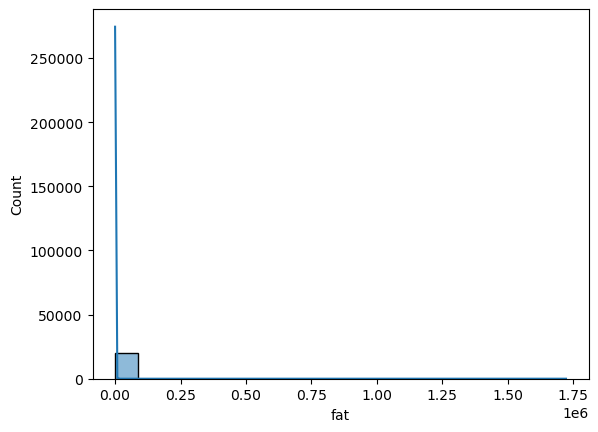

In [57]:
sns.histplot(state_rec['fat'], bins=20, kde = True) # shows extreme values for 'fat'

In [58]:
# Check how many extreme values
state_rec[state_rec['fat'] >1000]

,title,rating,calories,protein,fat,sodium,STATE_NAME
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,Alabama
1837,Bacon-Wrapped Trout Stuffed with Balsamic Onio...,4.375,12010.0,403.0,1115.0,18212.0,Alabama
2976,Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,7540990.0,Alabama
3280,Braised Short Ribs with Red Wine Gravy,3.750,19576.0,723.0,1818.0,2950.0,Alabama
5138,Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,3449373.0,Alabama
6368,Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,27570999.0,Alabama
6645,Braised Orange-Ginger Short Ribs with Dried Ap...,4.375,16050.0,592.0,1480.0,2629.0,Alabama
6912,Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,3449512.0,Alabama
8192,Grilled Lamb Chops with Porcini Mustard,5.000,24117.0,940.0,2228.0,4382.0,Alabama
8873,Grilled Cumin Chicken Breasts with Avocado Salsa,3.750,22312.0,332.0,1007.0,13820.0,Alabama


In [59]:
# Clean extreme values
# 500 was picked because it is beyond belief there could be a meal with over 500 gr of fat!
state_rec = state_rec[state_rec['fat'] < 500] 

In [60]:
# check the shape
state_rec.shape

(20012, 7)

In [61]:
# Create a 'cal_per_portion' column
state_rec['cal_per_portion'] = state_rec['calories']*4

<Axes: xlabel='cal_per_portion', ylabel='Count'>

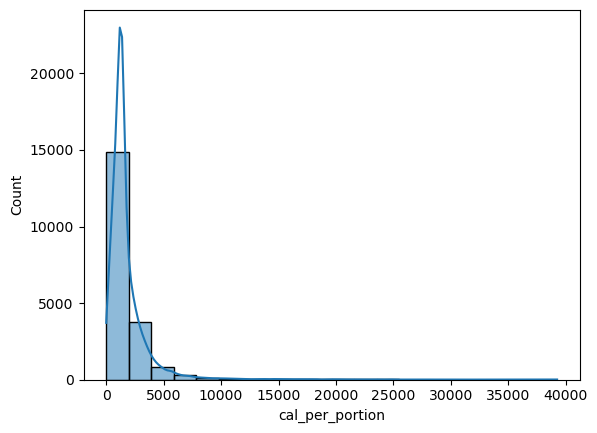

In [62]:
# show extreme values for 'cal_per_portion'
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)

In [74]:
# Clean extreme values in 'cal_per_portion'
state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

<Axes: xlabel='rating', ylabel='Count'>

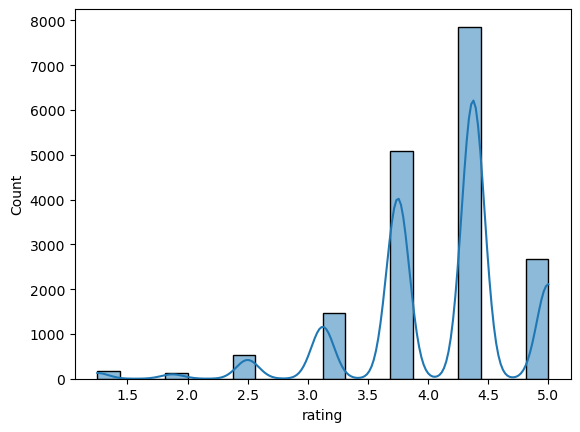

In [75]:
# Check the rating variable
sns.histplot(state_rec['rating'], bins=20, kde = True)

In [76]:
# Select only entries with a non-zero rating
state_rec = state_rec[state_rec['rating'] >= 1]

In [77]:
state_rec.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME,cal_per_portion
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama,1704.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama,1612.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York,660.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,331.0,8.0,17.0,294.0,Alabama,1324.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California,2188.0


In [78]:
state_rec.shape

(17902, 8)

In [79]:
state_rec.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

## Plotting a chloropleth

In [80]:
# Create a data frame with just the states and the values for rating we want plotted
data_to_plot = state_rec[['STATE_NAME','rating']]
data_to_plot.head()

,STATE_NAME,rating
0,Alabama,2.500
1,Alabama,4.375
2,New York,3.750
3,Alabama,5.000
4,California,3.125


In [81]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [82]:
#current dir
cwd = os.getcwd()
cwd

'/Users/profkdfischer/World Happiness Report Analysis/03 Scripts'

In [83]:
map.save('plot_data.html')